<a href="https://colab.research.google.com/github/ZeboBotirova/speech_emotion_dt/blob/main/Speech_emotion_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 !mkdir -p ~/.kaggle

In [ ]:
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torchaudio
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Model, Wav2Vec2Processor, Trainer, TrainingArguments, Wav2Vec2ForSequenceClassification

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Dataset loading
paths = []
labels = []
for dirname, _ , filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print(filename)
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')



OAF_home_neutral.wav
OAF_learn_neutral.wav
OAF_love_neutral.wav
OAF_luck_neutral.wav
OAF_shawl_neutral.wav
OAF_dip_neutral.wav
OAF_doll_neutral.wav
OAF_turn_neutral.wav
OAF_gaze_neutral.wav
OAF_boat_neutral.wav
OAF_peg_neutral.wav
OAF_cause_neutral.wav
OAF_whip_neutral.wav
OAF_hall_neutral.wav
OAF_numb_neutral.wav
OAF_should_neutral.wav
OAF_bone_neutral.wav
OAF_tough_neutral.wav
OAF_burn_neutral.wav
OAF_back_neutral.wav
OAF_sure_neutral.wav
OAF_beg_neutral.wav
OAF_jug_neutral.wav
OAF_wire_neutral.wav
OAF_raid_neutral.wav
OAF_kite_neutral.wav
OAF_king_neutral.wav
OAF_date_neutral.wav
OAF_fit_neutral.wav
OAF_lid_neutral.wav
OAF_nag_neutral.wav
OAF_jail_neutral.wav
OAF_rose_neutral.wav
OAF_which_neutral.wav
OAF_keep_neutral.wav
OAF_team_neutral.wav
OAF_nice_neutral.wav
OAF_bar_neutral.wav
OAF_dog_neutral.wav
OAF_sell_neutral.wav
OAF_cheek_neutral.wav
OAF_phone_neutral.wav
OAF_jar_neutral.wav
OAF_wife_neutral.wav
OAF_lot_neutral.wav
OAF_hire_neutral.wav
OAF_tool_neutral.wav
OAF_south_neutr

In [ ]:
len(paths)

2800

In [ ]:
#Dataframe creation
df = pd.DataFrame()
df['audio_paths'] =paths
df['labels'] =labels
df.head()

,audio_paths,labels
0,/content/TESS Toronto emotional speech set dat...,neutral
1,/content/TESS Toronto emotional speech set dat...,neutral
2,/content/TESS Toronto emotional speech set dat...,neutral
3,/content/TESS Toronto emotional speech set dat...,neutral
4,/content/TESS Toronto emotional speech set dat...,neutral


In [ ]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

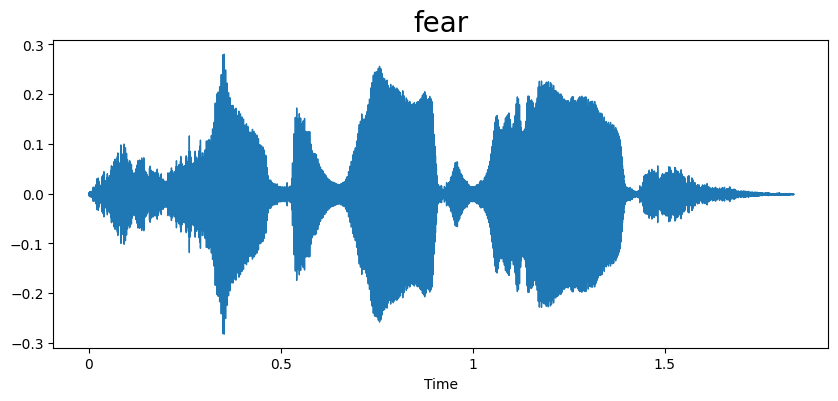

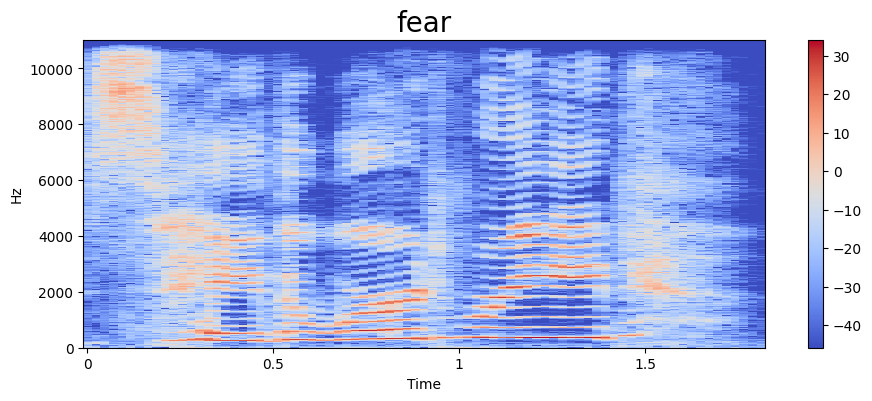

In [ ]:
emotion = 'fear'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

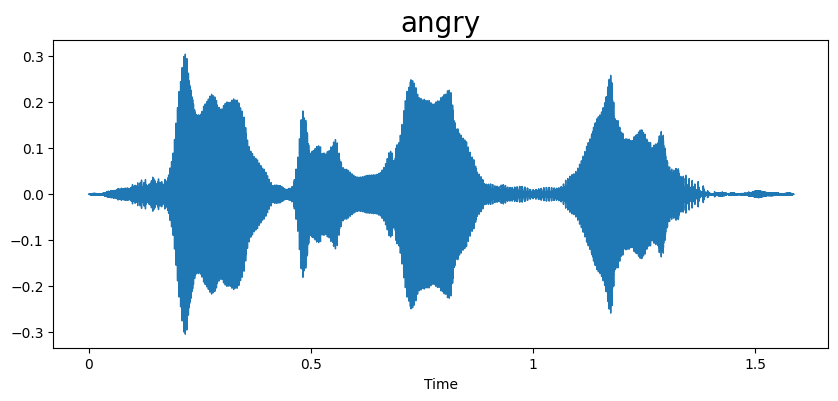

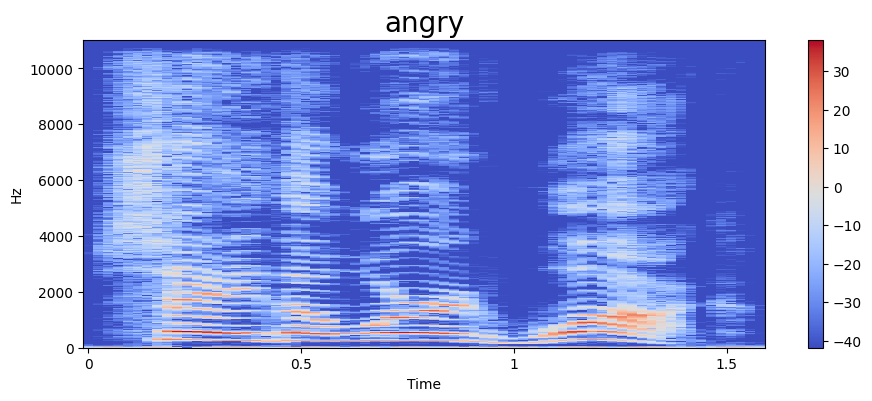

In [ ]:
emotion = 'angry'
path = np.array(df['audio_paths'][df['labels']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

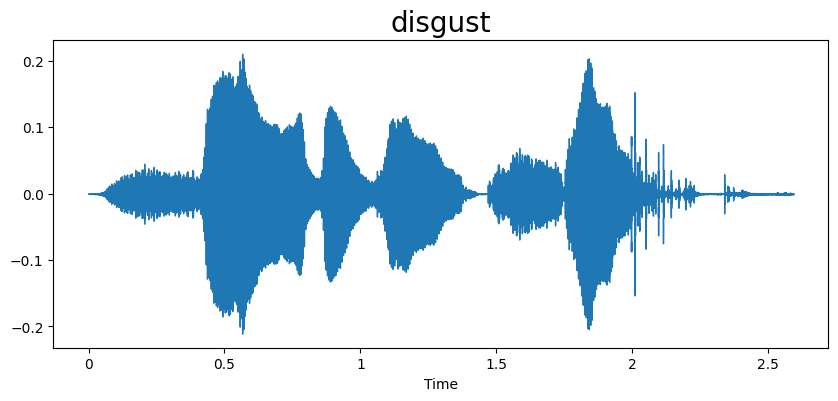

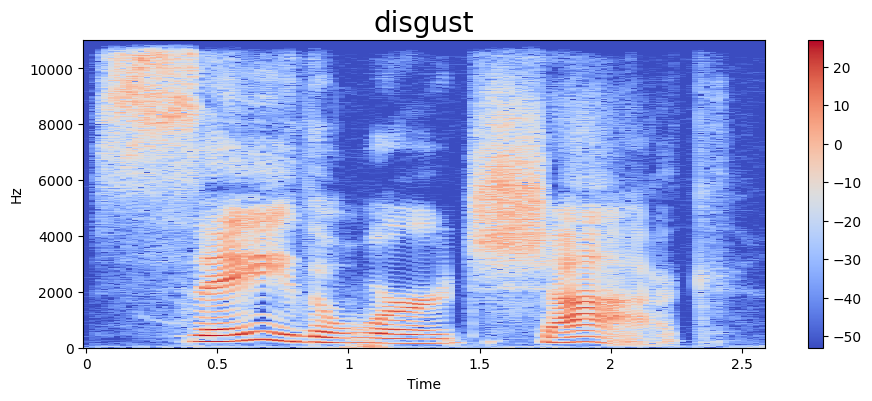

In [ ]:
emotion = 'disgust'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

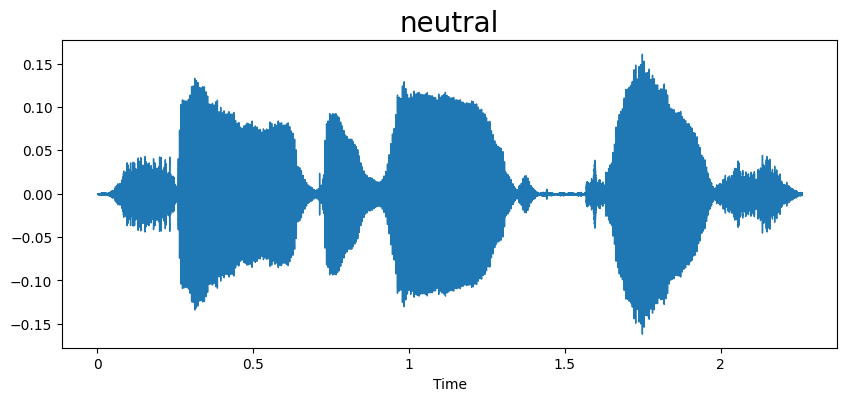

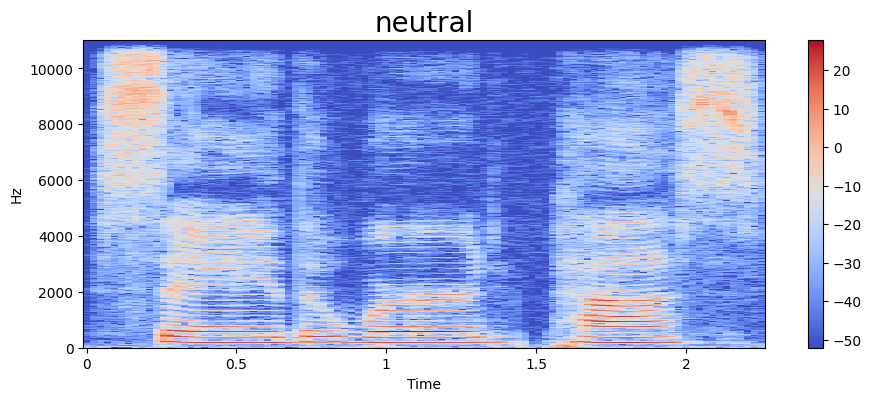

In [ ]:
emotion = 'neutral'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

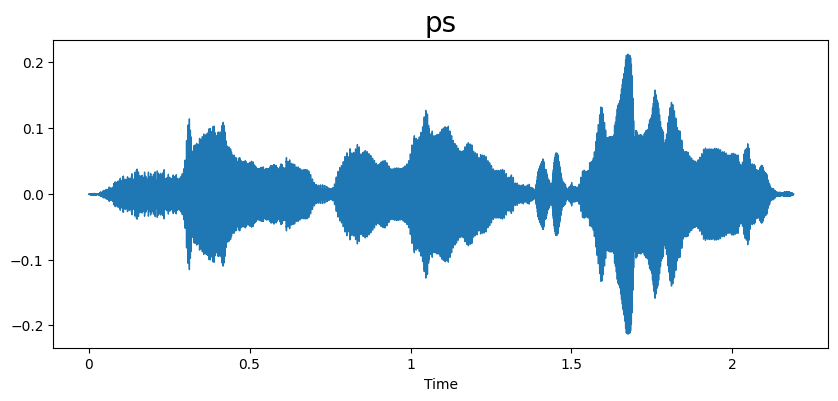

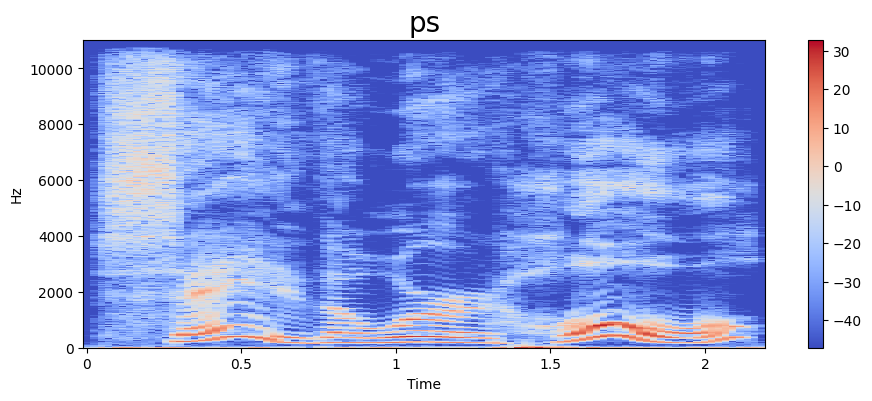

In [ ]:
emotion = 'ps'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

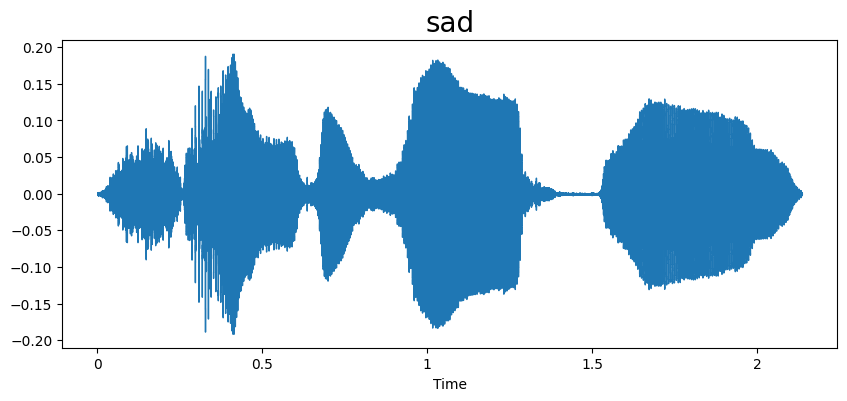

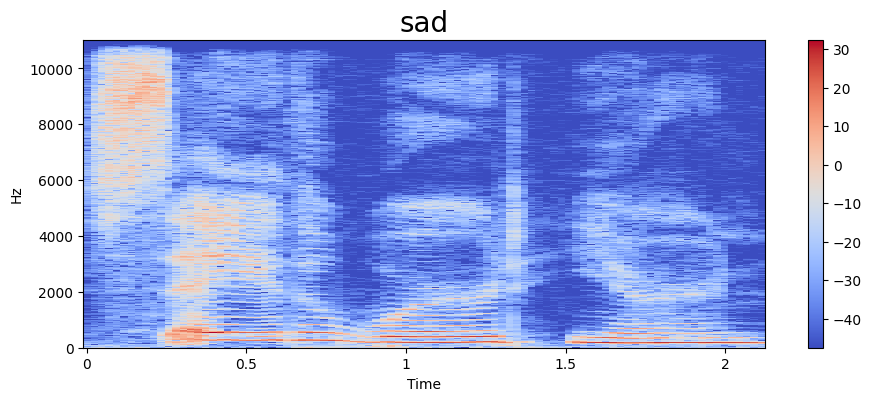

In [ ]:
emotion = 'sad'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

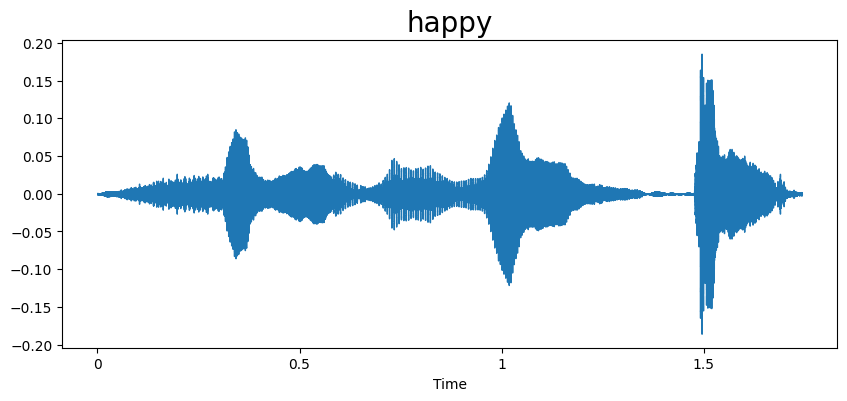

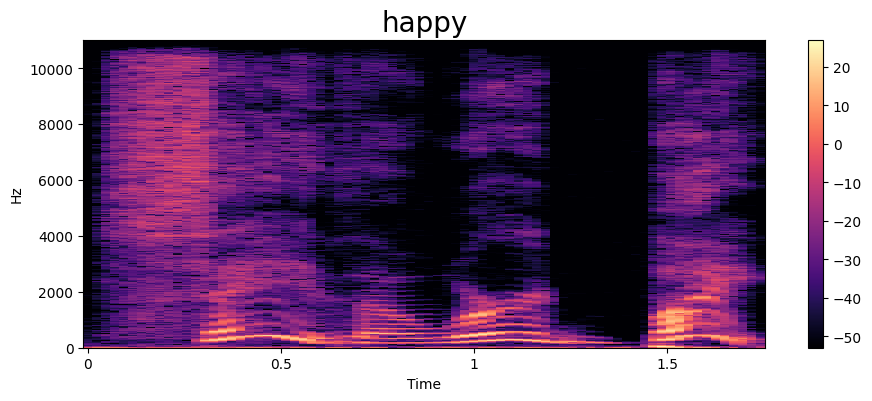

In [ ]:
emotion = 'happy'
path = np.array(df['audio_paths'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)l
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
#emotion = 'ps'
#path = np.array(df['audio_paths'][df['labels']==2])[0]
#data, sampling_rate = librosa.load(path)
#len(data)
#sampling_rate * 2

44100

In [ ]:
#convert labels to integer
label_map = {label: idx for idx, label in enumerate(df['labels'].unique())}
inverse_label_map = {idx: label for idx, label in label_map.items()}
df['labels'] = df['labels'].map(label_map)
df.head(2)

,audio_paths,labels
0,/content/TESS Toronto emotional speech set dat...,0
1,/content/TESS Toronto emotional speech set dat...,0


In [ ]:
class SpeechEmotionDataset(Dataset):
  def __init__(self, audio_paths, processor, max_length = 32000):
    self.df = df
    self.processor = processor
    self.max_length = max_length

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    audio_path = self.df.iloc[idx]['audio_paths']
    label = self.df.iloc[idx]['labels']

    speech, sr = librosa.load(audio_path, sr = 16000)

    if len(speech) > self.max_length:
      speech = speech[:self.max_length]
    else:
      speech = np.pad(speech, (0, self.max_length - len(speech)), mode = 'constant')

    #
    inputs = self.processor(speech, sampling_rate = 16000, return_tensors = 'pt', padding = True, truncate = True, max_length = self.max_length)
    input_values = inputs.input_values.squeeze()

    return {'input_values':  input_values, 'labels': torch.tensor(label, dtype=torch.long)}
#



In [ ]:
#split the data for train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from platform import processor
#initialize the processor amd model
processor = Wav2Vec2Processor.from_pretrained('facebook/wav2vec2-base')
model = Wav2Vec2ForSequenceClassification.from_pretrained('facebook/wav2vec2-base', num_labels = 7)

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset = SpeechEmotionDataset(train_df, processor)
test_dataset = SpeechEmotionDataset(test_df, processor)

In [ ]:
train_dataset[0]

Keyword argument `truncate` is not a valid argument for this processor and will be ignored.


{'input_values': tensor([ 0.0029,  0.0064,  0.0049,  ..., -0.1903, -0.1920, -0.1893]),
 'labels': tensor(0)}

In [ ]:
#create data loaders
train_dataloader = DataLoader(train_dataset, batch_size = 8, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = 8, shuffle = False)


In [ ]:
# set training parametrs
training_args = TrainingArguments(
    output_dir = './results',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 16,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to = []
)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis = 1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average = 'weighted')
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [ ]:
#Initialize trainer
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = test_dataset,
    compute_metrics = compute_metrics
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.365671,1.000000,1.000000,1.000000,1.000000
2,No log,0.121973,1.000000,1.000000,1.000000,1.000000
3,0.520200,0.092564,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=525, training_loss=0.5005330458141508, metrics={'train_runtime': 506.3156, 'train_samples_per_second': 16.59, 'train_steps_per_second': 1.037, 'total_flos': 1.525231008e+17, 'train_loss': 0.5005330458141508, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.09256363660097122, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 33.3384, 'eval_samples_per_second': 83.987, 'eval_steps_per_second': 5.249, 'epoch': 3.0}


In [ ]:
import random
idx = random.randrange(0, len(test_dataset))
print("Original Label:", int(test_dataset[idx]['labels']))
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')

with torch.no_grad():
  outputs = model(input_values)
logits = outputs.logits
predicted_class = logits.argmax(dim=-1).item()
predicted_class
#print("Predicted Label:", inverse_label_map[predicted_class])



Original Label: 1


1